In [1]:
print('Dinorah GV')

Dinorah GV


# Exploratory Data Analysis Exercise
* For this part we will be using the `data/cars.csv` dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline 
import scipy.stats as stats

df = pd.read_csv('data/cars.csv')
df.head()

Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

  Vehicle Size Vehicle Style  highway MPG  city mpg  Popularity   MSRP  
0      Compact         Coupe           26        19        3916  46135  
1      Compact   Convertible           28        19        3916  40650  
2      Compact         Coupe           28        20        3916  36350  
3      Compact         Coupe           28        18        3916  29450  
4      Compact   Convertible           28        18        3916  34500

# Load in the data
* Use the file in the data folder called 'cars.csv'
* Save it as a varible named 'df'
* Display the first 5 rows of our dataframe

In [3]:
df = pd.read_csv('data/cars.csv', sep=',')
df.head(5)

Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

  Vehicle Size Vehicle Style  highway MPG  city mpg  Popularity   MSRP  
0      Compact         Coupe           26        19        3916  46135  
1      Compact   Convertible           28        19        3916  40650  
2      Compact         Coupe           28        20        3916  36350  
3      Compact         Coupe           28        18        3916  29450  
4      Compact   Convertible           28        18        3916  34500

# Data clean up part 1.

1. Print the number of duplicate rows we have in our dataframe.

2. Modify our df to have all duplicate rows removed. 

3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

In [4]:
# 1. Print the number of duplicate rows we have in our dataframe.
df.duplicated().sum()

720

In [5]:
#  2. Modify our df to have all duplicate rows removed. 
df = df.drop_duplicates()
print(df.shape)

(11194, 15)


In [6]:
# 3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.
df.duplicated().sum()

0

# Data clean up part 2.
* Which column has the most null values and how many null values does it have?
* Print how long our dataframe is.
* Remove any row that has a null value in it. 
* Do a sanity check and pring how long our dataframe is now that we have removed our null values.

In [7]:
# * Which column has the most null values and how many null values does it have?
a = df.isnull().sum().idxmax()
b = df.isnull().sum().max()
print(a,':',b)

Engine HP : 69


In [8]:
# * Print how long our dataframe is.
df.shape[0]

11194

In [9]:
# * Remove any row that has a null value in it. 
df = df.dropna()

In [10]:
# * Do a sanity check and pring how long our dataframe is now that we have removed our null values.
df.shape[0]

11092

### Make a bar chart that displays how many times each brand of car appears in this data. 
_Brand of car is the `Make` of the car._
* You can achieve this by using value_counts or by a groupby.  Either is fine with me. 

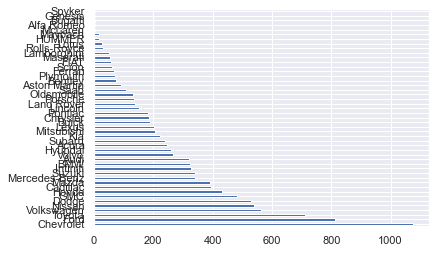

In [11]:
# Make a bar chart that displays how many times each brand of car appears in this data. 
brand = df['Make'].value_counts().plot(kind='barh')
brand

# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.  And also sort the values so the bar chart displays from lowest to highest.

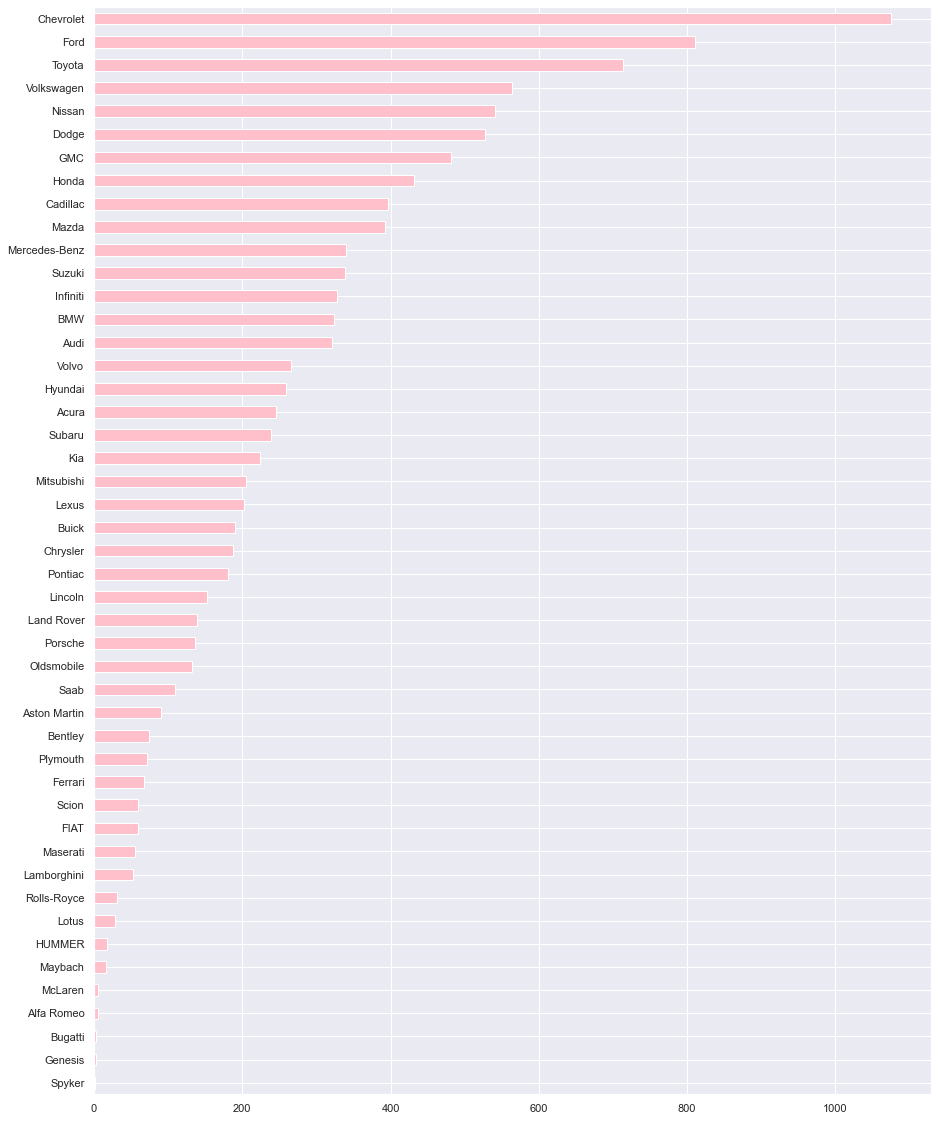

In [12]:
# Make the cart more legible, by making it a horizontal bar chart, sorting the values, and changing the figure size.
df['Make'].value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(15,20), color='pink')


# Make a timeline line chart in which the x-axis is the Year, and the y-axis is the mean MSRP.
* you're going to have to do a `groupby` for this one for sure. 
* What's noticeable about it and what do you think the error is...


there is a significant spike in MSRP in the year 2000


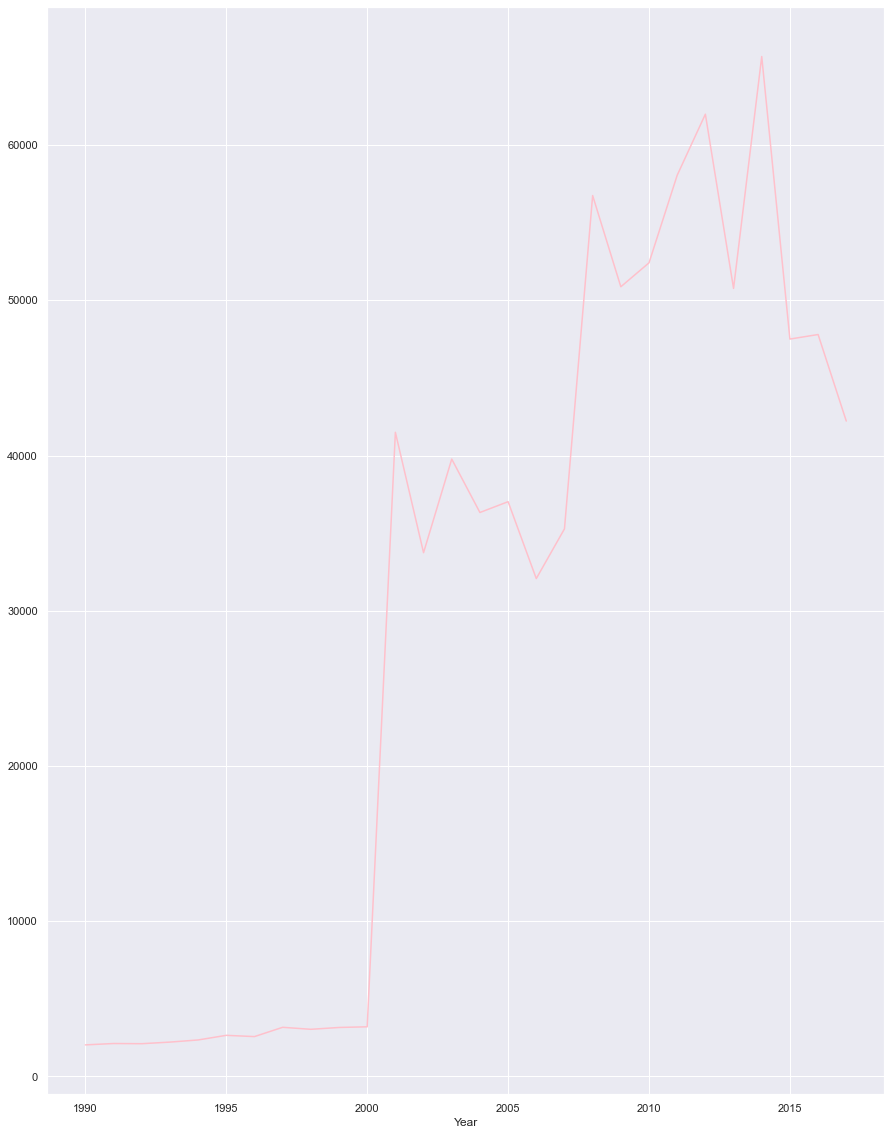

In [13]:
# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
df.groupby('Year')['MSRP'].mean().plot(x ='Year', y ='MSRP', color='pink',figsize=(15,20))
print('there is a significant spike in MSRP in the year 2000')

# It seems as though in the years before (and includig) 2000, they were counting in tens.
Make a new column that is called `adjusted_price`, that contains all prices, however, for every year before 2000 make it 10x the original MSRP.  
   * Hint; you might need to use our old friend `np.where`

In [14]:
# Make a column where is 10 when year is less than 2000, else 1.
df["adjusted_price"] = np.where(df["Year"] < 2000, 10, 1)

# Multiply the MSRP by the price adjuster.
df["adjusted_price"] = df['adjusted_price'] * df['MSRP']

df.tail(70)

Make         Model  Year                Engine Fuel Type  Engine HP  \
11844      GMC  Yukon Hybrid  2013                regular unleaded      332.0   
11845      GMC      Yukon XL  2015        flex-fuel (unleaded/E85)      355.0   
11846      GMC      Yukon XL  2015        flex-fuel (unleaded/E85)      355.0   
11847      GMC      Yukon XL  2015        flex-fuel (unleaded/E85)      355.0   
11848      GMC      Yukon XL  2015  premium unleaded (recommended)      420.0   
...        ...           ...   ...                             ...        ...   
11909    Acura           ZDX  2012     premium unleaded (required)      300.0   
11910    Acura           ZDX  2012     premium unleaded (required)      300.0   
11911    Acura           ZDX  2012     premium unleaded (required)      300.0   
11912    Acura           ZDX  2013  premium unleaded (recommended)      300.0   
11913  Lincoln        Zephyr  2006                regular unleaded      221.0   

       Engine Cylinders Transmission Type      Driven_Wheels  Number of Doors  \
11844               8.0         AUTOMATIC   rear wheel drive              4.0   
11845               8.0         AUTOMATIC   four wheel drive              4.0   
11846               8.0         AUTOMATIC   rear wheel drive              4.0   
11847               8.0         AUTOMATIC   four wheel drive              4.0   
11848               8.0         AUTOMATIC   rear wheel drive              4.0   
...                 ...               ...                ...              ...   
11909               6.0         AUTOMATIC    all wheel drive              4.0   
11910               6.0         AUTOMATIC    all wheel drive              4.0   
11911               6.0         AUTOMATIC    all wheel drive              4.0   
11912               6.0         AUTOMATIC    all wheel drive              4.0   
11913               6.0         AUTOMATIC  front wheel drive              4.0   

      Vehicle Size  Vehicle Style  highway MPG  city mpg  Popularity   MSRP  \
11844        Large        4dr SUV           23        20         549  61960   
11845        Large        4dr SUV           22        15         549  61925   
11846        Large        4dr SUV           23        16         549  58925   
11847        Large        4dr SUV           22        15         549  53440   
11848        Large        4dr SUV           21        15         549  67220   
...            ...            ...          ...       ...         ...    ...   
11909      Midsize  4dr Hatchback           23        16         204  46120   
11910      Midsize  4dr Hatchback           23        16         204  56670   
11911      Midsize  4dr Hatchback           23        16         204  50620   
11912      Midsize  4dr Hatchback           23        16         204  50920   
11913      Midsize          Sedan           26        17          61  28995   

       adjusted_price  
11844           61960  
11845           61925  
11846           58925  
11847           53440  
11848           67220  
...               ...  
11909           46120  
11910           56670  
11911           50620  
11912           50920  
11913           28995  

[70 rows x 16 columns]

# Replot the new adjusted price.  
* Make the y-axis start at 0 and go up to 100,000

(0.0, 100000.0)

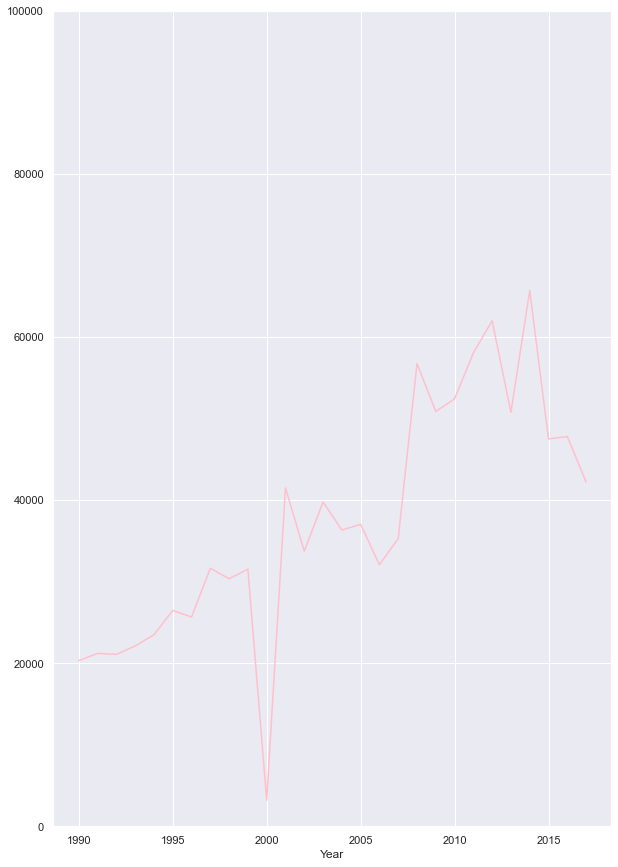

In [15]:
# Plot new prices
df.groupby('Year')['adjusted_price'].mean().plot(x ='Year', y ='MSRP', color='pink',figsize=(10,15)).set_ylim(0, 100000)


# Plot the relationship between Engine HP and highway MPG

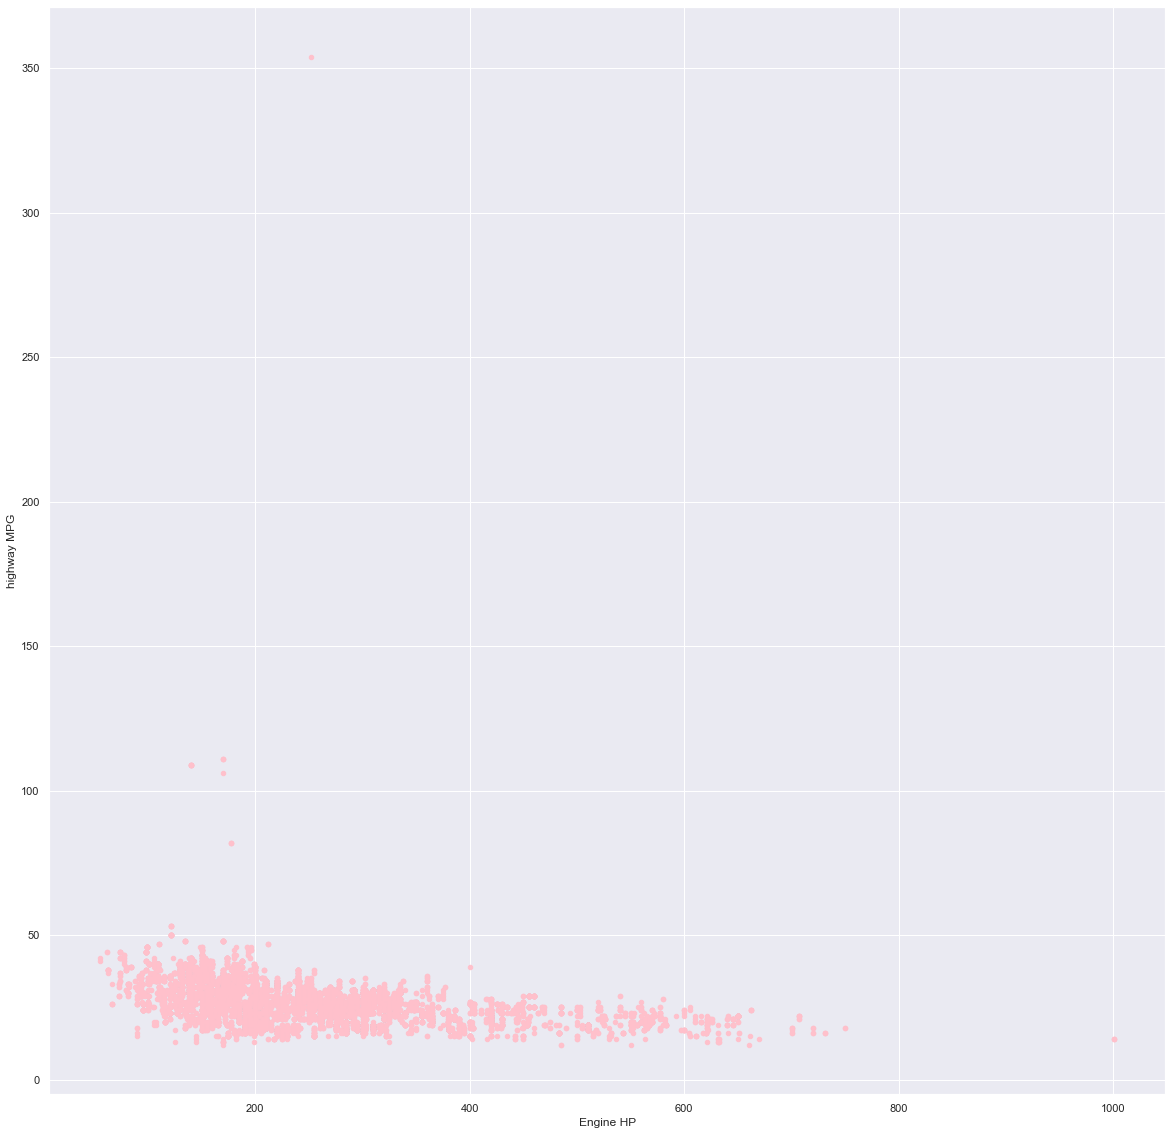

In [16]:
# Plot the relationship between Engine HP and highway MPG
df.plot(kind='scatter',x='Engine HP', y='highway MPG', figsize=(20, 20), color = 'pink')

In [17]:
### IF WE DIDN'T GET TO REMOVING OUTLIERS IN CLASS, THEN YOU CAN SKIP THIS SECTION
# Remove any outliers from Engine HP and highway MPG 


# Replot the relationship between Engine HP and highway MPG


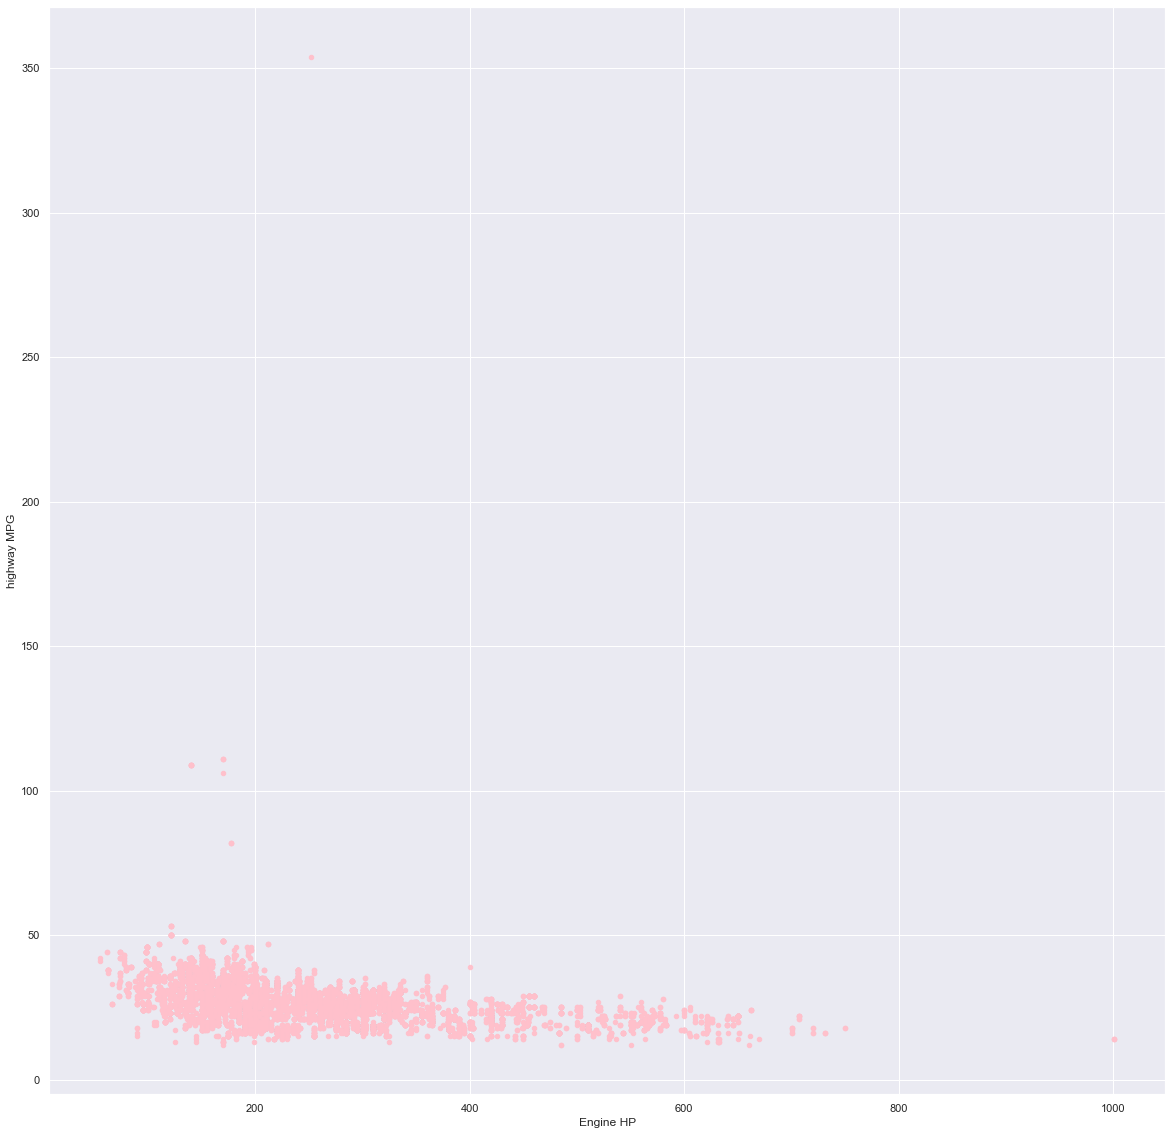

In [18]:
# Re-Plot the relationship between Engine HP and highway MPG
df.plot(kind='scatter',x='Engine HP', y='highway MPG', figsize=(20, 20), color = 'pink')

# Make a scatter plot of Engine HP vs highway MPG

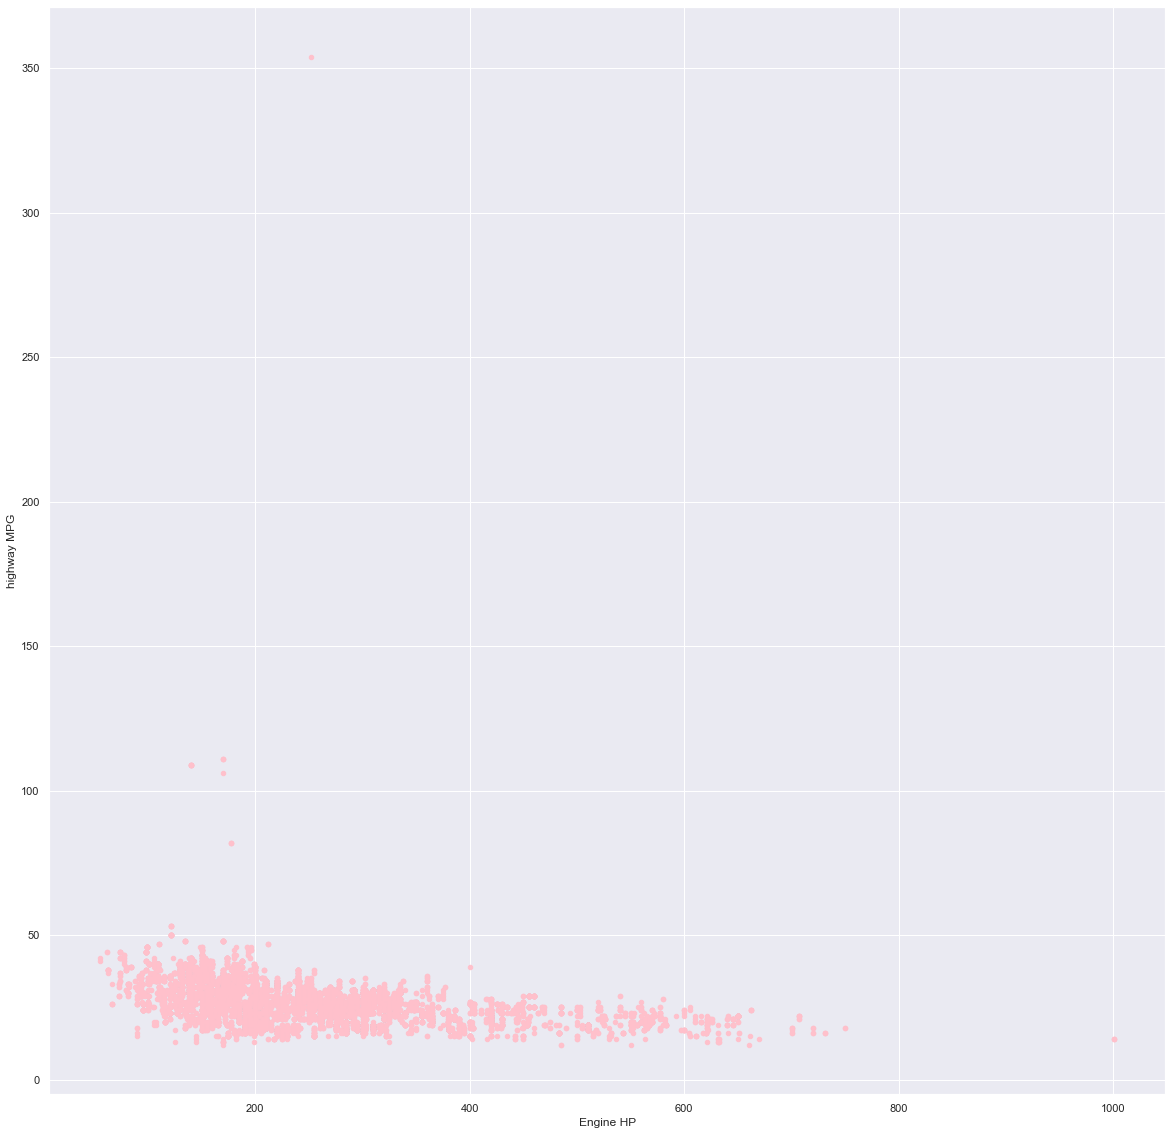

In [19]:
# Make a scatter plot of Engine HP vs highway MPG
df.plot(kind='scatter',x='Engine HP', y='highway MPG', figsize=(20, 20), color = 'pink')

# What does this plot tell you about how Engine HP affects highway MPG?

In [20]:
# What does this plot tell you about how Engine HP affects highway MPG?

print('Lower engine hp results in higher highway mpg')

Lower engine hp results in higher highway mpg


# Using a pairplot, display all of the linear relationship.
* Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

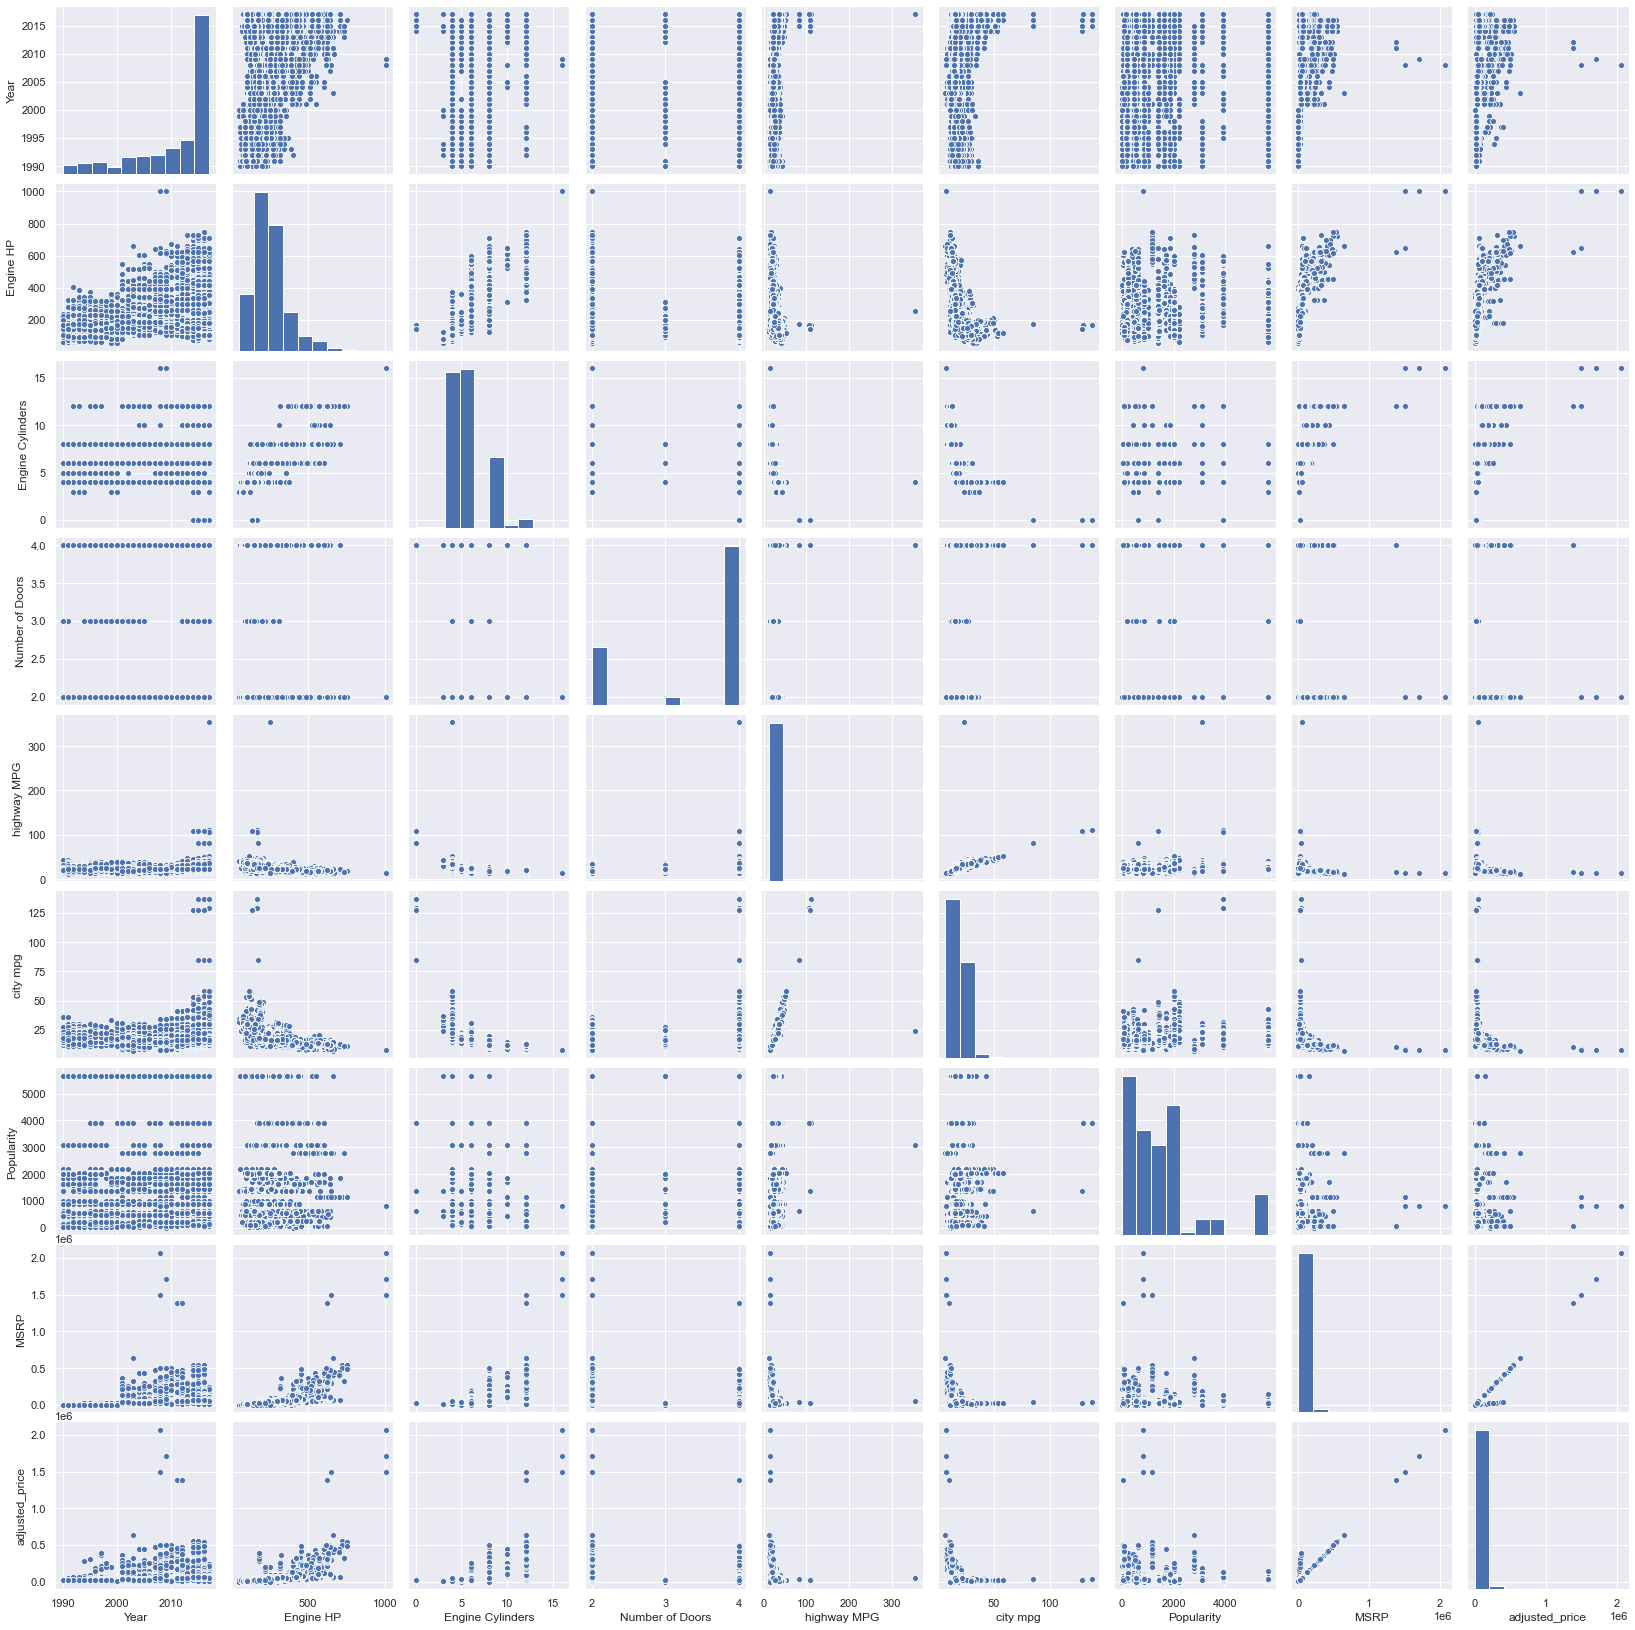

In [21]:
# Using a pairplot, display all of the linear relationship.
sns.pairplot(data=df, palette='pink')
plt.show()

In [22]:
# * Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).
#highway mpg and city mpg


# Find which features actually have the strongest linear relationship using correlations.
* Make a heatmap plot of all of the correlations in our dataset.
* Change the figure size of our heatmap plot to be 8x8
* __Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.__

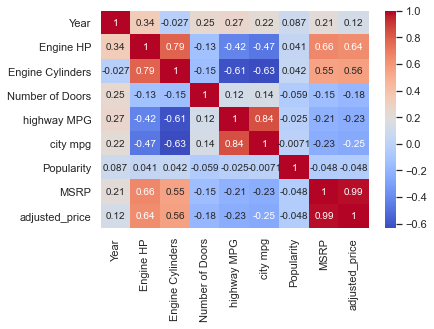

In [25]:
# * Make a heatmap plot of all of the correlations in our dataset.
# * Change the figure size of our heatmap plot to be 8x8

sns.heatmap(df.corr(), 
            annot=True, 
            cmap='coolwarm');
plt.show()


In [26]:
# Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.

print('engine hp and engine cylinders')

engine hp and engine cylinders


# [EXTRA CREDIT] 
* (EASY) In the column names, replace all the spaces with an underscore, and make them all lowercase as well.

* (Easy) Learn more about cleaning data by following along in TA Georgios' tutorial in TA-Tips folder named `GI-Tips_1.ipynb`.

* (Medium) Do the same vizualizations using bokeh by following along in TA Stevens tutorial in the TA-Tips folder named `SS-Tips.ipynb`.


* (Medium) Learn how to remove outliers properly by following along in TA Georgios' tutorial in TA-Tips folder named `GI-Tips_2.ipynb`.

* (Variable) Complete one or more of the [Extra-Extra credit](https://docs.google.com/document/d/1D99fY13cF3kzIiJILZ3fwzhOF73z_xPBNxxweMpBkOY/edit) items. 


